# ch 10. 단순선형 회귀
## boston housing

In [26]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

housing = pd.read_csv('housing.data',header=None, sep="\s+")
housing.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


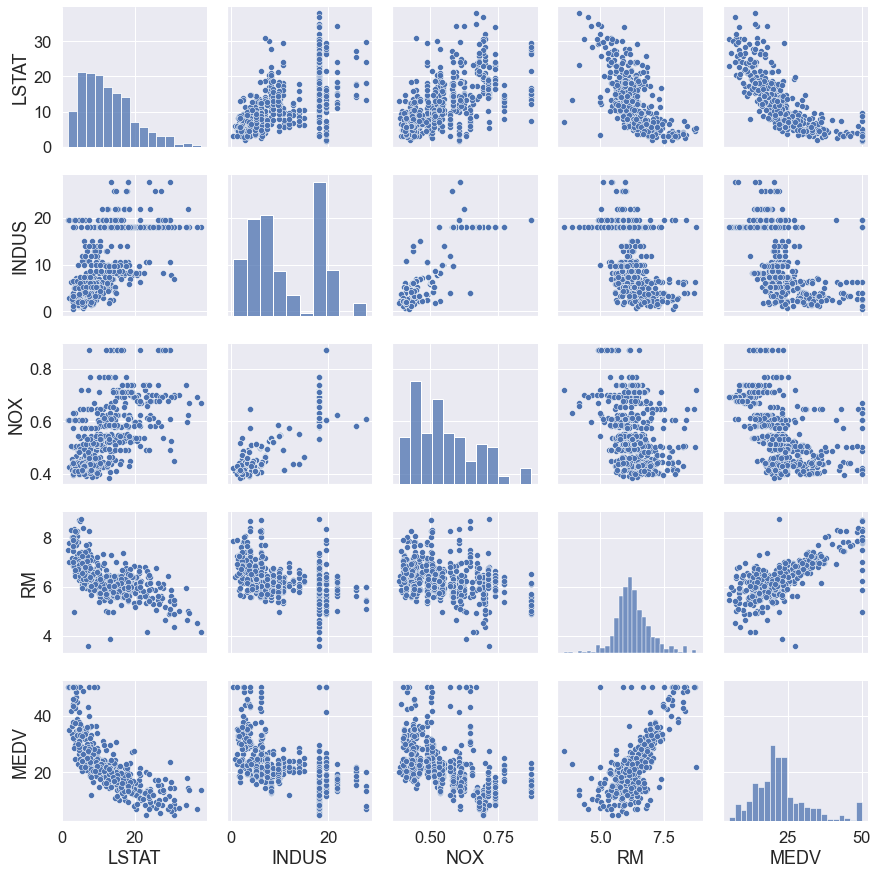

In [27]:
#그래프로 보기
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(housing[cols],height=2.5)
plt.tight_layout()
plt.show()

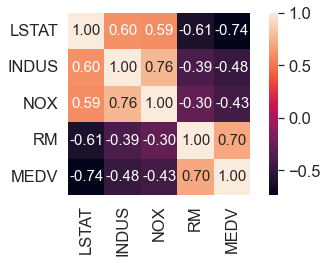

In [28]:
#수치로 보기
cm=np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True, annot = True, square=True, fmt='.2f',annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.tight_layout()
plt.show()


In [29]:
X=housing[['RM']].values
y=housing[['MEDV']].values
print(X.shape)
print(y.shape)


(506, 1)
(506, 1)


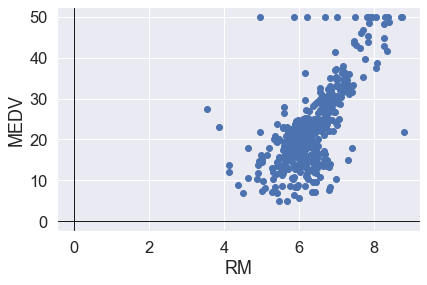

In [30]:
plt.figure()
plt.scatter(X,y)
plt.tight_layout()
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.axvline(x=0, color='k',linewidth=1)
plt.axhline(y=0, color='k',linewidth=1)
plt.show()

In [31]:
def normalization(x:np.array)->np.array:
    m,u=x.mean(), x.std()
    return (x-m)/u

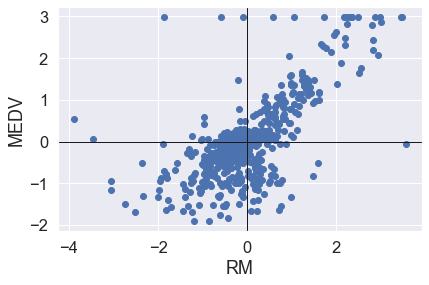

In [32]:
X_norm=normalization(X)
y_norm=normalization(y[:, np.newaxis]).flatten()


plt.figure()
plt.scatter(X_norm,y_norm)
plt.tight_layout()
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.axvline(x=0, color='k',linewidth=1)
plt.axhline(y=0, color='k',linewidth=1)
plt.show()

In [33]:
def lin_regplot(X,y,model):
    plt.figure()
    plt.scatter(X,y, c="steelblue",edgecolor="white",s=70)
    plt.plot(X,model.predict(X), c="black", lw=2)
    plt.xlabel("RM")
    plt.ylabel("MEDV")
    plt.tight_layout()
    plt.show()
    return None

In [34]:
#최소자승법

class NormalEquation(object):
    def __init__(self,X):
        Xb = np.hstack((np.ones((X.shape[0],1)),X))
        w=np.zeros(X.shape[1])
        z=np.linalg.inv(np.dot(Xb.T, Xb))
        self.w=np.dot(z, np.dot(Xb.T, y))
    def __repr__(self) :
        return f"기울기: {self.w[1][0]:.3f} \n 절편: {self.w[0][0]:.3f}"

    def predict(self,x):
        return np.dot(x, self.w[1:])+ self.w[0]
    
linReg=NormalEquation(X)
print(linReg)

기울기: 9.102 
 절편: -34.671


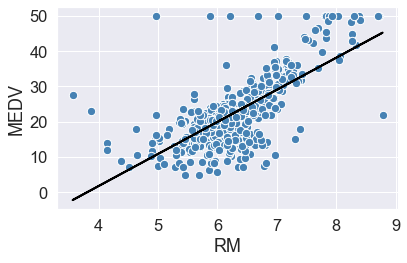

In [35]:
lin_regplot(X,y,linReg)

In [41]:
class LinearRegressionGD(object):
    def __init__(self, eta: float = 0.001,
                 n_iter: int = 20,
                 random_state: int = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.random_state = random_state

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True

    def net_input(self, X):
        return np.dot(X, self.w_[1:])+self.w_[0]

    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/len(errors)
            self.cost_.append(cost)

    def __repr__(self):
        return f"기울기: {self.w_[1:]} \n 절편: {self.w_[0]}"

    def predict(self, x):
        return (self.net_input(X))


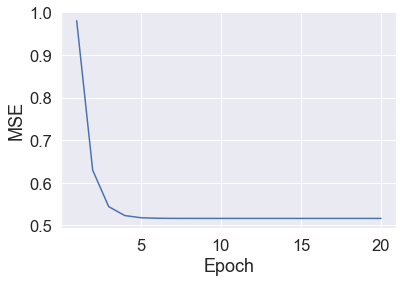

In [42]:
GD = LinearRegressionGD()
GD.fit(X_norm, y_norm)
plt.plot(range(1, GD.n_iter+1), GD.cost_)
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.show()
